## 대표적인 데이터 구조6: 해쉬 테이블 (Hash Table)

### 1. 해쉬 구조
* Hash Table: 키(Key)에 데이터(Value)를 저장하는 데이터 구조
  - Key를 통해 바로 데이터를 받아올 수 있으므로, 속도가 획기적으로 빨라짐
  - 파이썬 딕셔너리(Dictionary) 타입이 해쉬 테이블의 예: Key를 가지고 바로 데이터(Value)를 꺼냄
  - 보통 배열로 미리 Hash Table 사이즈만큼 생성 후에 사용 (공간과 탐색 시간을 맞바꾸는 기법)  
      => hash table의 공간을 늘림으로써 충돌로 인한 추가적인 자료구조를 실행하지 않도록 만든다는 뜻
  - <font color='#BF360C'>단, 파이썬에서는 해쉬를 별도 구현할 이유가 없음 - 딕셔너리 타입을 사용하면 됨</font>  
      => key를 hash function에 넣으면 데이터가 저장되어 있는 위치, 저장되어야 할 위치가 나온다
     

### 2. 알아둘 용어
* 해쉬(Hash): 임의 값을 고정 길이로 변환하는 것  
  => hash 구조 -> 블록체인 : 어떤 방대한 데이터(임의 값)이더라도 256 정도의 고정 길이로 변환하는 것  
* 해쉬 테이블(Hash Table): 키 값의 연산에 의해 직접 접근이 가능한 데이터 구조  
  => 해시 주소와 데이터 공간이 연결되어 있다  
* 해싱 함수(Hashing Function): Key에 대해 산술 연산을 이용해 데이터 위치를 찾을 수 있는 함수  
  => key를 입력으로 받아서 hash table의 특정 주소 값(hash 주소 = hash 값)을 반환  
* 해쉬 값(Hash Value) 또는 해쉬 주소(Hash Address): Key를 해싱 함수로 연산해서, 해쉬 값을 알아내고, 이를 기반으로 해쉬 테이블에서 해당 Key에 대한 데이터 위치를 일관성있게 찾을 수 있음  
* 슬롯(Slot): 한 개의 데이터를 저장할 수 있는 공간  
* 저장할 데이터에 대해 Key를 추출할 수 있는 별도 함수도 존재할 수 있음  
<img src="https://www.fun-coding.org/00_Images/hash.png" width=400 />

### 3. 간단한 해쉬 예

#### 3.1. hash table 만들기
* 참고: 파이썬 list comprehension - https://www.fun-coding.org/PL&OOP5-2.html  
  위 링크에서 iterator와 generator 개념도 확인할 수 있다

In [1]:
# 슬롯이 있어야 하고
# 슬롯을 지칭할 수 있는 해시 주소가 있어야 함
hash_table = list([i for i in range(10)])
hash_table       # 해시 주소와 각각의 슬롯이 연결된 해시 테이블

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### 3.2. 이번엔 초간단 해쉬 함수를 만들어봅니다.
- 다양한 해쉬 함수 고안 기법이 있으며, 가장 간단한 방식이 Division 법 (나누기를 통한 나머지 값을 사용하는 기법)

In [7]:
def hash_func(key):
    return key % 5  # 나머지를 출력하므로, key값이 1이든 1억이든 관계없이 해시 주소가 고정된 길이로 return 된다.

#### 3.3. 해쉬 테이블에 저장해보겠습니다.
- 데이터에 따라 필요시 key 생성 방법 정의가 필요함

In [15]:
data1 = 'Andy'  # 각각의 데이터에 매칭될 수 있는 key가 있어야 함. 
data2 = 'Dave'
data3 = 'Trump'
data4 = 'Anthor'
## ord(): 문자의 ASCII(아스키)코드 리턴
# ASCII (영어와 특수문자만 인코딩할 수 있음) -> Unicode (세계 모든 언어 인코딩할 수 있음)
print (ord(data1[0]), ord(data2[0]), ord(data3[0]))  

# data1[0] 에 대한 key 값 = ord(data1[0]) : ord는 각각의 데이터에 대한 key 값을 별도도 추출하는 함수
# 추출된 key값을 hash function에 넣으면 key 값을 5로 나눈 나머지를 계산
# 그 결과값이 hash 주소가 된다
print (ord(data1[0]), hash_func(ord(data1[0])))
print (ord(data1[0]), ord(data4[0]))  # data1과 data4의 주소가 같다 - 'Andy'가 'Anthor'로 overriding될 위험 있다(충돌 위험)

65 68 84
65 0
65 65


- 3.3.2. 해쉬 테이블에 값 저장 예
  - data:value 와 같이 data 와 value를 넣으면, 해당 data에 대한 key를 찾아서, 해당 key에 대응하는 해쉬주소에 value를 저장하는 예

In [10]:
def storage_data(data, value):
    key = ord(data[0])
    hash_address = hash_func(key)
    hash_table[hash_address] = value   # hash func의 결과값으로 반환된 hash_address -> 주소에 해당하는 슬롯에 가서 value를 저장한다.

#### 3.4. 해쉬 테이블에서 특정 주소의 데이터를 가져오는 함수도 만들어봅니다.

In [12]:
# 데이터 저장
storage_data('Andy', '01055553333')
storage_data('Dave', '01044443333')
storage_data('Trump', '01022223333')

#### 3.5. 실제 데이터를 저장하고, 읽어보겠습니다.

In [13]:
def get_data(data):
    key = ord(data[0])
    hash_address = hash_func(key)
    return hash_table[hash_address]

In [14]:
get_data('Andy') # python dict와 매우 유사

'01055553333'

- 특정 키(해시 함수가 key%5인 경우 key 값은 0,1,2,3,4 뿐이다)에 해당하는 데이터는 해시 테이블의 특정 슬롯에만 저장할 수 있다.
- 검색에서 해쉬 테이블 구조가 배열보다 좋은 이유

### 4. 자료 구조 해쉬 테이블의 장단점과 주요 용도
- 장점
  - 데이터 저장/읽기 속도가 빠르다. (검색 속도가 빠르다.)
  - 해쉬는 키에 대한 데이터가 있는지(중복) 확인이 쉬움
- 단점 
  - 일반적으로 저장공간이 좀더 많이 필요하다.
  - **여러 키에 해당하는 주소가 동일할 경우 충돌을 해결하기 위한 별도 자료구조가 필요함**
- 주요 용도
  - 검색이 많이 필요한 경우
  - 저장, 삭제, 읽기가 빈번한 경우
  - 캐쉬 구현시 (중복 확인이 쉽기 때문)  
     - 캐쉬는 성능 측면에서 매우 중요한 요소. 캐쉬에 이미 있는 내용이라면 메모리에 동일한 내용을 갖고 있을 필요 없음

### 5. 프로그래밍 연습

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습1: 리스트 변수를 활용해서 해쉬 테이블 구현해보기</font></strong><br>
1. 해쉬 함수: key % 8<br>
2. 해쉬 키 생성: hash(data)
</div>

In [1]:
hash("Dave")   # hash 함수는 python 내장 함수

852086668854755866

In [2]:
hash_table = list([0 for i in range(8)])    # hash table 구현 : 8개의 공간을 만들기

def get_key(data):
    return hash(data)

def hash_function(key):
    return key % 8

def save_data(data, value):
    hash_address = hash_function(get_key(data))  # data를 key로 변환 -> key를 hash 함수에 넣어 주소값을 가져옴
    hash_table[hash_address] = value             # hash table 중 hash address에 해당하는 공간에 value를 저장
    
def read_data(data):
    hash_address = hash_function(get_key(data))
    return hash_table[hash_address]             # 매칭되는 값을 읽어옴


In [3]:
save_data('Dave', '0102030200')
save_data('Andy', '01033232200')
read_data('Dave')

'0102030200'

In [4]:
# hash 내장 함수를 거쳐, key를 8로 나눈 나머지를 가지고 저장위치를 판단 :
hash_table

[0, 0, '0102030200', 0, '01033232200', 0, 0, 0]

### 6. 충돌(Collision) 해결 알고리즘 (좋은 해쉬 함수 사용하기)
> 해쉬 테이블의 가장 큰 문제는 충돌(Collision)의 경우입니다.
> 이 문제를 충돌(Collision) 또는 해쉬 충돌(Hash Collision)이라고 부릅니다.

#### 6.1. Chaining 기법
- **개방 해슁 또는 Open Hashing 기법** 중 하나: 해쉬 테이블 저장공간 외의 공간을 활용하는 기법
- 충돌이 일어나면, 링크드 리스트라는 자료 구조를 사용해서, 링크드 리스트로 데이터를 추가로 뒤에 연결시켜서 저장하는 기법

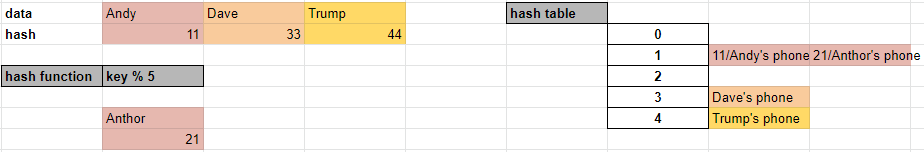

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습2: 연습1의 해쉬 테이블 코드에 Chaining 기법으로 충돌해결 코드를 추가해보기</font></strong><br>
1. 해쉬 함수: key % 8<br>
2. 해쉬 키 생성: hash(data)
</div>

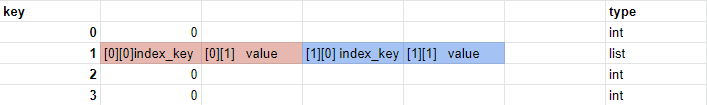

In [12]:
hash_table = list([0 for i in range(8)])    

def get_key(data):    # key = 특정 data에 대해 반환된 hash 값
    return hash(data)

def hash_function(key):
    return key % 8

def save_data(data, value):
    index_key = get_key(data)  # hash key를 바로 hash 함수에 넣지 않고, 별도의 변수에 저장
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0 :  # hash_table = list([0 for i in range(8)]) 에서 hash_table의 default 값은 0인데, value가 들어가면 0이 아님
        for index in range(len(hash_table[hash_address])):   # list에 append하여 데이터를 추가하면, linked list와 유사한 효과
            if hash_table[hash_address][index][0] == index_key:
                hash_table[hash_address][index][1] = value
                return
            hash_table[hash_address].append([index_key, value])  # chaining : append 형태로 list data가 테이블 밖의 슬롯에 추가됨
    else:
        hash_table[hash_address] = [[index_key, value]]
            
    
def read_data(data):
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0:    # key, value 형태로 데이터가 저장되어 있음
        for index in range(len(hash_table[hash_address])):
            if hash_table[hash_address][index][0] == index_key:
                return hash_table[hash_address][index][1]
        return None
    else:                                # data가 저장되어 있지 않음
        return None


**read_data : Chaining 기법의 검색 프로세스**
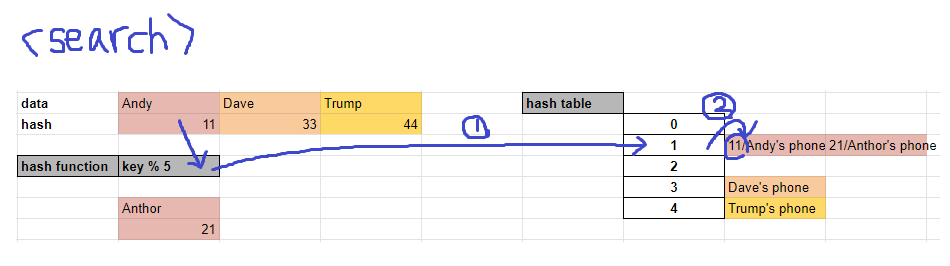

In [14]:
# hash 값이 동일한 key가 두 개 이상 나와야 list 형태로 데이터가 충돌 없이 저장되었는지 확인할 수 있음
print (hash('Dave') % 8)
print (hash('Dd') % 8)
print (hash('Data') % 8)
print (hash('Dorothy') % 8)
print (hash('Domino') % 8)
print (hash('David') % 8)

2
3
7
4
5
5


In [15]:
# 충돌없이 value가 잘 저장되었음
save_data('Domino', '1201023010')
save_data('David', '3301023010')
read_data('Domino')

'1201023010'

In [16]:
# 동일한 주소를 가진 경우, linked list 형태로 데이터가 저장되었음을 확인 [key, value]
# 미리 저장공간을 확보해야 하는 배열과 달리, 동일한 주소에 데이터가 추가될 때만 linked list 형태로 데이터를 연결하면 되어 공간 효율 좋음
hash_table

[0,
 0,
 0,
 0,
 0,
 [[6449557934523152909, '1201023010'],
  [2333900442791004013, '3301023010'],
  [2333900442791004013, '3301023010']],
 0,
 0]

#### 6.2. Linear Probing 기법
- **폐쇄 해슁 또는 Close Hashing 기법** 중 하나: 해쉬 테이블 저장공간 안에서 충돌 문제를 해결하는 기법
- 충돌이 일어나면, 해당 hash address의 다음 address부터 맨 처음 나오는 빈공간에 저장하는 기법
  - 저장공간 활용도를 높이기 위한 기법

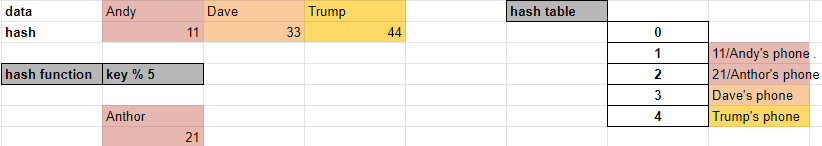

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습3: 연습1의 해쉬 테이블 코드에 Linear Probling 기법으로 충돌해결 코드를 추가해보기</font></strong><br>
1. 해쉬 함수: key % 8<br>
2. 해쉬 키 생성: hash(data)
</div>

In [17]:
hash_table = list([0 for i in range(8)])    # hash table을 8개의 슬롯을 가진 공간으로 저장

def get_key(data):    
    return hash(data)

def hash_function(key):
    return key % 8

def save_data(data, value):
    index_key = get_key(data) 
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0 :  
        for index in range(hash_address, len(hash_table)): # hash_address(key % 8)부터 8(index번호는 7)까지 하나씩 순회하며 빈 공간을 찾음
            if hash_table[index] == 0:
                hash_table[index] = [index_key,value]
                return
            elif hash_table[index][0] == index_key: # hash_adress에 index_key가 동일한 데이터가 이미 저장되어 있다면, value를 업데이트
                hash_table[index][1] = value
                return
    else:   # 해당 hash address에 data가 한번도 저장된 적이 없는 슬롯
        hash_table[hash_address] = [index_key, value]
            
    
def read_data(data):
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0:    # key, value 형태로 데이터가 저장되어 있음
        for index in range(hash_address, len(hash_table)):
            if hash_table[index] == 0:   # 해당 key값이 매칭될 때까지 슬롯을 순회하다 빈 슬롯이 나왔다 = 해당 데이터가 저장된 적이 없다
                return None
            elif hash_table[index][0] == index_key:
                return hash_table[index][1]
                return hash_table[hash_address][index][1]
        return None
    else:                                # data가 저장된 적이 없음
        return None


In [20]:
# 내장함수 hash 함수는 특정 데이터에 대해 항상 동일한 hash 값을 내지 않을 수 있다.
# 컴퓨터를 껐다 재실행하면 다른 값으로 저장할 수도 있음
print (hash('dk') % 8)
print (hash('da') % 8)
print (hash('du') % 8)

1
7
1


In [21]:
# 충돌 없이 값이 제대로 반환되었음
save_data('dk', '01200123123')
save_data('du', '3333333333')
read_data('dk')

'01200123123'

#### 6.3. 빈번한 충돌을 개선하는 기법
- 해쉬 함수을 재정의 및 해쉬 테이블 저장공간을 확대
- 예:

```python
hash_table = list([None for i in range(16)])

def hash_function(key):
    return key % 16
```
   - 지금까지 hash table을 8개의 슬롯을 가진 공간으로 저장했다 -> 4개 이상(슬롯의 50% 이상)의 데이터를 저장하면 충돌 가능성 높다
   - 이런 경우 주로 hash table의 슬롯을 2배로 늘려 충돌 가능성을 낮추는 것이 일반적
      - 해쉬 테이블은 공간과 탐색 시간을 맞바꾸는 기법 : 공간을 늘리면 충돌이 줄어들어 탐색 시간 등이 함께 줄어든다.


### 참고: 해쉬 함수와 키 생성 함수
- 파이썬의 hash() 함수는 실행할 때마다, 값이 달라질 수 있음
- 유명한 해쉬 함수들이 있음: SHA(Secure Hash Algorithm, 안전한 해시 알고리즘)
  - 어떤 데이터도 유일한 고정된 크기의 고정값을 리턴해주므로, 해쉬 함수로 유용하게 활용 가능

#### SHA-1

In [29]:
import hashlib   # 수행되지 않는다면, 터미널에서 pip install hashlib

data = 'test'.encode()         # 인코딩 = 문자열 데이터를 byte로 변환
hash_object = hashlib.sha1()
hash_object.update(data)       # hash_object.update(b'test') 와 동일한 코드
hex_dig = hash_object.hexdigest() # hash값이 들어가 있는 object를 보통 16진수로 추출
print (hex_dig)

a94a8fe5ccb19ba61c4c0873d391e987982fbbd3


#### SHA-256
블록체인에서도 굉장히 많이 쓰이는 해쉬 함수 (추출된 해쉬 값으로 원본 데이터의 value를 추론할 수 없음)  
SHA-1보다 고정된 길이가 길어서 보안이 좋음  

In [30]:
import hashlib

data = 'test'.encode()
hash_object = hashlib.sha256()
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print (hex_dig)

9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습4: 연습2의 Chaining 기법을 적용한 해쉬 테이블 코드에 키 생성 함수를 sha256 해쉬 알고리즘을 사용하도록 변경해보기</font></strong><br>
1. 해쉬 함수: key % 8<br>
2. 해쉬 키 생성: hash(data)
</div>

In [31]:
import hashlib

hash_table = list([0 for i in range(8)])

def get_key(data):
        hash_object = hashlib.sha256()
        hash_object.update(data.encode())  # data는 문자열이기 때문에, 인코딩해서 byte로 변환해야 함
        hex_dig = hash_object.hexdigest() 
        return int(hex_dig, 16) # 위에 출력된 해쉬 값을 보면 16진수의 문자열. 따라서, 아래에서 8로 나눈 나머지를 구하려면 10진수의 정수(int)로 바꿔줘야 함

def hash_function(key):
    return key % 8

def save_data(data, value):
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0:
        for index in range(hash_address, len(hash_table)):
            if hash_table[index] == 0:
                hash_table[index] = [index_key, value]
                return
            elif hash_table[index][0] == index_key:
                hash_table[index][1] = value
                return
    else:
        hash_table[hash_address] = [index_key, value]

def read_data(data):
    index_key = get_key(data)
    hash_address = hash_function(index_key)
    
    if hash_table[hash_address] != 0:
        for index in range(hash_address, len(hash_table)):
            if hash_table[index] == 0:
                return None
            elif hash_table[index][0] == index_key:
                return hash_table[index][1]
    else:
        return None


In [32]:
type(hex_dig)

str

In [33]:
int(hex_dig,16)

72155939486846849509759369733266486982821795810448245423168957390607644363272

In [34]:
int(hex_dig,16) % 8

0

In [35]:
print (get_key('db') % 8)
print (get_key('da') % 8)
print (get_key('dh') % 8)

1
2
2


In [36]:
# linear probing 기법으로 충돌 문제 해결했고
# SHA-256으로 동일한 데이터에 대해서 항상 동일한 hash address를 가진 함수로 개선
save_data('da', '01200123123')
save_data('dh', '3333333333')
read_data('dh')

'3333333333'

### 7. 시간 복잡도
- 일반적인 경우(Collision이 없는 경우)는 O(1)
- 최악의 경우(Collision이 모두 발생하는 경우)는 O(n)
    - Chaining : 주소값이 모두 동일한 경우, 모든 데이터를 linked list로 연결해야 함
    - Linear probing : 모든 슬롯에 데이터가 저장되어 있는 경우, 하나씩 순회하면서 가장 마지막에 있는 빈 슬롯에 데이터를 저장해야 함

> 원래는 Big O 표기법의 경우 최악의 경우를 산정해서 시간 복잡도를 계산하지만.   
> 해쉬 테이블의 경우, 일반적인 경우를 기대하고 만들기 때문에(충돌이 없도록 설계하는 게 일반적), 시간 복잡도는 O(1) 이라고 말할 수 있음  

### 검색에서 해쉬 테이블의 사용 예
- 16개의 배열에 데이터를 저장하고, 검색할 때 O(n)
- 16개의 데이터 저장공간을 가진 위의 해쉬 테이블에 데이터를 저장하고, 검색할 때 O(1)
   - 저장과 검색에 있어서, 해쉬 테이블은 배열보다 훨씬 개선된 자료구조